Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [475]:
df = pd.read_csv('lending_club_loan_two.csv')

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Data Analysis

In [477]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


<AxesSubplot:xlabel='loan_status', ylabel='count'>

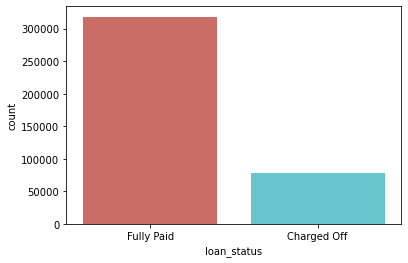

In [478]:
sns.countplot(x='loan_status',palette='hls',data=df)

(0.0, 50000.0)

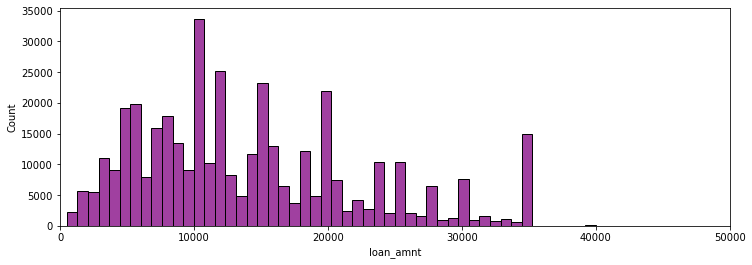

In [479]:
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'],bins=50,kde=False,color='purple')
plt.xlim(0,50000)

In [480]:
#Calculate the correlation between all continuous numeric variables 
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

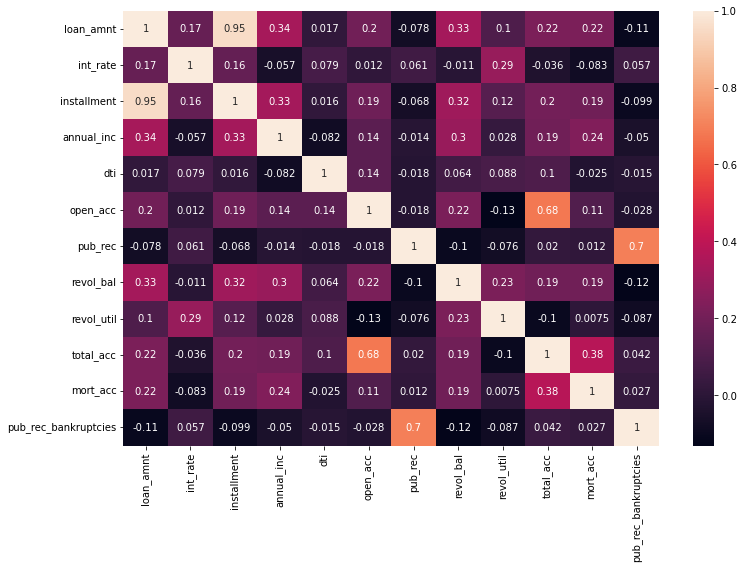

In [481]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

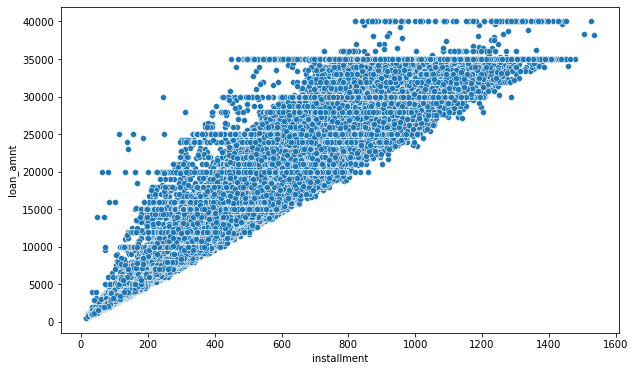

In [482]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

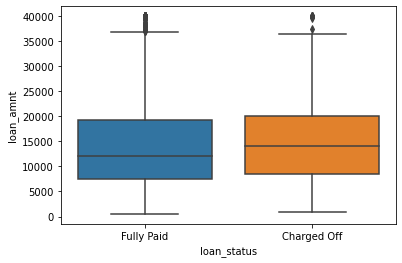

In [483]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [484]:
#Calculate the summary statistics for the loan amount, grouped by the loan_status.
df.groupby('loan_status')['loan_amnt'].describe().transpose()

loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,15126.300967,13866.878771
std,8505.090557,8302.319699
min,1000.000000,500.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19225.000000
max,40000.000000,40000.000000


In [485]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [486]:
sub_sort = sorted(df['sub_grade'].unique())
sub_sort

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

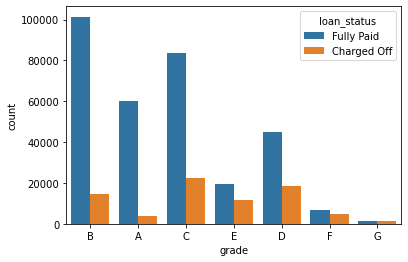

In [487]:
sns.countplot(x='grade',hue='loan_status',data=df)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

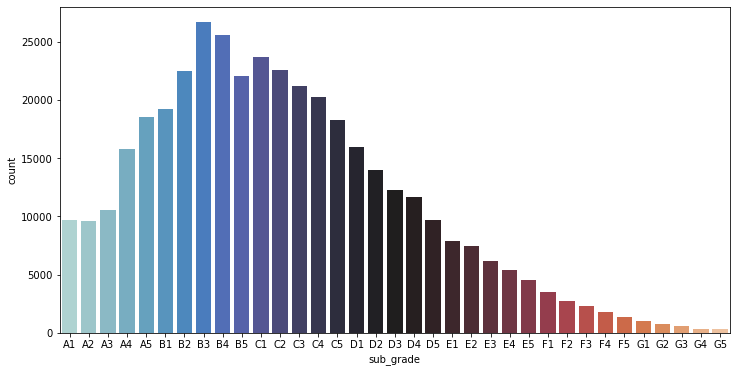

In [488]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df,order=sub_sort,palette='icefire')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

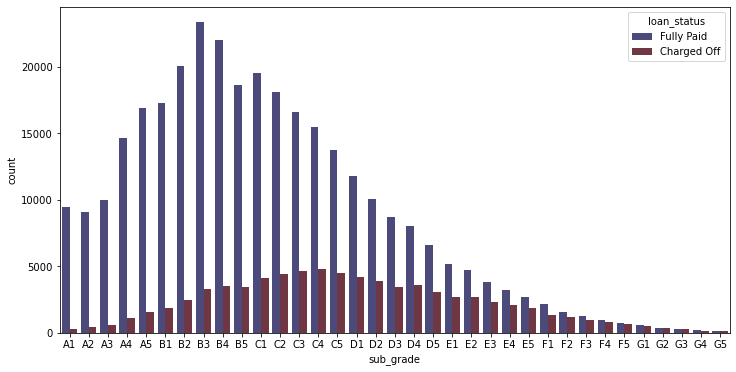

In [489]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df,order=sub_sort,palette='icefire',hue='loan_status')

In [490]:
f_g = df[(df['grade']=='F') | (df['grade']=='G')]

In [491]:
sub_sort = sorted(f_g['sub_grade'].unique())
sub_sort

['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

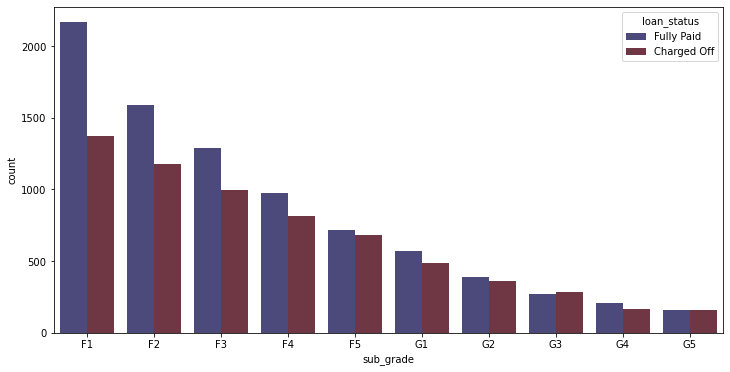

In [492]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df,order=sub_sort,palette='icefire',hue='loan_status')

Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"

In [493]:
def loan_repaid(loan_status):
    if loan_status =="Fully Paid":
        return 1
    elif loan_status=="Charged Off":
        return 0

In [494]:
df['loan_repaid']= df['loan_status'].apply(loan_repaid)

In [495]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

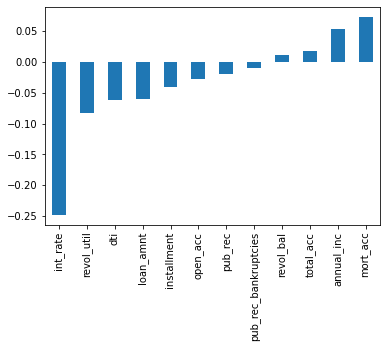

In [496]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

# Data PreProcessing

In [497]:
df.head(20)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...,1
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX...",1
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723,1
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690,1
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813",1


In [498]:
len(df)

396030

In [499]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [500]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [501]:
len(df['emp_title'].unique())

173106

In [502]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [503]:
df = df.drop('emp_title',axis=1)

In [504]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [505]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [506]:
order_emp = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

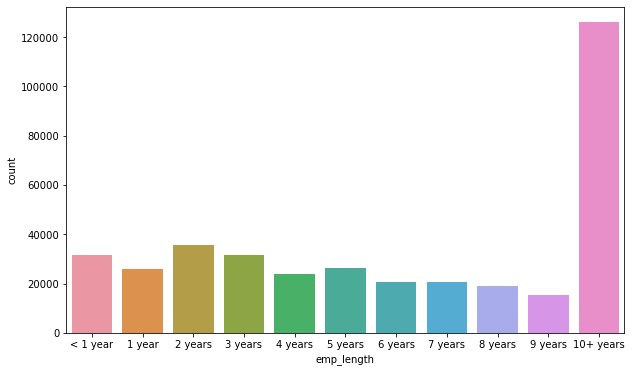

In [507]:
plt.figure(figsize=(10,6))
sns.countplot(x='emp_length',order=order_emp,data=df)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

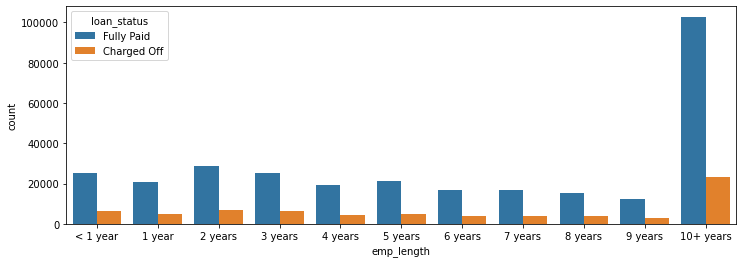

In [508]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',order=order_emp,hue='loan_status',data=df)

In [509]:
emp_charg = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [510]:
emp_full = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [511]:
emp_len = emp_charg/emp_full

In [512]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

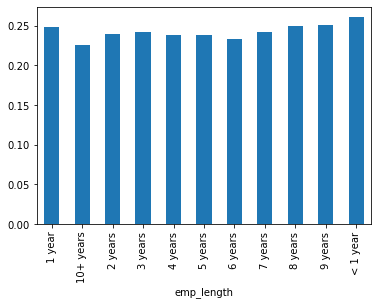

In [513]:
emp_len.plot(kind='bar')

In [514]:
df = df.drop('emp_length',axis=1)

In [515]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [516]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [517]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [518]:
df = df.drop('title',axis=1)

In [519]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [520]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [521]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [522]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [523]:
total_avg = df.groupby('total_acc').mean()['mort_acc']

In [524]:
total_avg[2.0]

0.0

In [525]:
def fill_mort(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_avg[total_acc]
    else:
        return mort_acc

In [526]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'], x['mort_acc']), axis=1)

In [527]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [528]:
df = df.dropna()

In [529]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Categorical Variables and Dummy Variables

In [530]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 395219 non-null  object
 1   grade                395219 non-null  object
 2   sub_grade            395219 non-null  object
 3   home_ownership       395219 non-null  object
 4   verification_status  395219 non-null  object
 5   issue_d              395219 non-null  object
 6   loan_status          395219 non-null  object
 7   purpose              395219 non-null  object
 8   earliest_cr_line     395219 non-null  object
 9   initial_list_status  395219 non-null  object
 10  application_type     395219 non-null  object
 11  address              395219 non-null  object
dtypes: object(12)
memory usage: 39.2+ MB


In [531]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [532]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [533]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [534]:
df = df.drop('grade',axis=1)

In [535]:
sub_grade = pd.get_dummies(df['sub_grade'],drop_first=True)

In [536]:
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade],axis=1)

In [537]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [538]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [539]:
dum = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

In [540]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

In [541]:
df = pd.concat([df,dum],axis=1)

In [542]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [543]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [544]:
dum1 = pd.get_dummies(df['home_ownership'],drop_first=True)

In [545]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [546]:
df = pd.concat([df,dum1],axis=1)

In [547]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [548]:
df['address'].value_counts()

USCGC Smith\nFPO AE 70466                            8
USS Smith\nFPO AP 70466                              8
USS Johnson\nFPO AE 48052                            8
USNS Johnson\nFPO AE 05113                           8
USNS Johnson\nFPO AP 48052                           7
                                                    ..
43570 Maxwell Field Apt. 502\nEast John, NH 22690    1
9983 Turner Cove\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\nRalphfurt, CO 29597                 1
3841 Liu Crest\nClarkchester, NC 29597               1
787 Michelle Causeway\nBriannaton, AR 48052          1
Name: address, Length: 392898, dtype: int64

In [549]:
df['zip_code'] = df['address'].str.extract(r"\b(\d{5})\b")

In [550]:
df['zip_code'] = df['zip_code'].astype(np.uint8)

In [551]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [552]:
df = df.drop('issue_d',axis=1)

In [553]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [554]:
df['earliest_cr_year'] = df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda earliest_cr_line:earliest_cr_line.year)

In [555]:
df = df.drop('earliest_cr_line',axis=1)

In [556]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   home_ownership  395219 non-null  object
 1   loan_status     395219 non-null  object
dtypes: object(2)
memory usage: 9.0+ MB


In [557]:
df = df.drop('home_ownership',axis=1)

In [558]:
df.select_dtypes(include='object').columns

Index(['loan_status'], dtype='object')

# Train_Test

In [559]:
from sklearn.model_selection import train_test_split

In [560]:
df = df.drop('loan_status',axis=1)

In [561]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [562]:
#df = df.sample(frac=0.1,random_state=101)

In [563]:
print(len(df))

395219


In [564]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [565]:
from sklearn.preprocessing import MinMaxScaler

In [566]:
scaler = MinMaxScaler()

In [567]:
scaler.fit(X_train)

MinMaxScaler()

In [568]:
MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler()

In [569]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

In [570]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [571]:
X_train.shape

(296414, 326)

In [572]:
model = Sequential()

#input
model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.2))

#hidden
model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.2))

#hidden
model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.2))

#output
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [573]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          validation_data=(X_test, y_test), 
          batch_size=256)

Epoch 1/25
1158/1158 [==============================] - 21s 15ms/step - loss: 0.3571 - val_loss: 0.3330
Epoch 2/25
1158/1158 [==============================] - 18s 15ms/step - loss: 0.3359 - val_loss: 0.3322
Epoch 3/25
1158/1158 [==============================] - 17s 14ms/step - loss: 0.3338 - val_loss: 0.3319
Epoch 4/25
1158/1158 [==============================] - 20s 17ms/step - loss: 0.3327 - val_loss: 0.3321
Epoch 5/25
1158/1158 [==============================] - 18s 16ms/step - loss: 0.3312 - val_loss: 0.3315
Epoch 6/25
1158/1158 [==============================] - 16s 14ms/step - loss: 0.3296 - val_loss: 0.3323
Epoch 7/25
1158/1158 [==============================] - 18s 15ms/step - loss: 0.3286 - val_loss: 0.3319
Epoch 8/25
1158/1158 [==============================] - 20s 17ms/step - loss: 0.3275 - val_loss: 0.3322
Epoch 9/25
1158/1158 [==============================] - 19s 16ms/step - loss: 0.3262 - val_loss: 0.3338
Epoch 10/25
1158/1158 [==============================] - 25s 21m

In [578]:
from tensorflow.keras.models import load_model

In [579]:
model.save('full_data_project_model.h5')  

# Evaluate

In [580]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

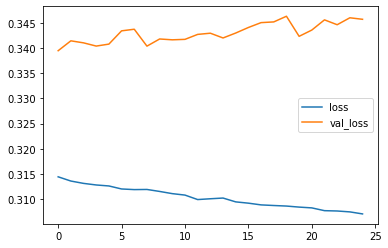

In [585]:
losses[['loss','val_loss']].plot()

In [608]:
from sklearn.metrics import classification_report,confusion_matrix

In [609]:
predictions = model.predict(X_test)
 
for i in range(len(predictions)):
    predictions[i][0] = int(round(predictions[i][0]))

In [610]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.36      0.50     19458
           1       0.86      0.98      0.92     79347

    accuracy                           0.86     98805
   macro avg       0.83      0.67      0.71     98805
weighted avg       0.85      0.86      0.83     98805



In [611]:
print(confusion_matrix(y_test, predictions))

[[ 7046 12412]
 [ 1749 77598]]


Given the customer below, would you offer this person a loan?

In [612]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
252                     0.00
253                     0.00
254                     0.00
255                     0.00
earliest_cr_year     1996.00
Name: 305323, Length: 326, dtype: float64

In [614]:
model.predict(new_customer.values.reshape(1,326))

array([[1.]], dtype=float32)

In [615]:
df.iloc[random_ind]['loan_repaid']

1.0